# Assignment 5: Principal Component Analysis (PCA)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline

#### <font color ='red'>TODO</font>: Add a short description of the dataset. You may also plot histograms to see the distribution of the dataset

In [2]:
import pandas as pd

df = pd.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 
    header=None, 
    sep=',')

df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
df.dropna(how="all", inplace=True) # drops the empty line at file-end
df.tail()

,sepal_len,sepal_wid,petal_len,petal_wid,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [3]:
# split data table into data X and class labels y
X = df.iloc[:,0:4].values
y = df.iloc[:,4].values

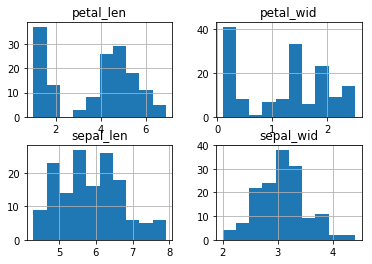

In [4]:
df.hist()
plt.show()

The iris dataset is a widely used dataset for visualization and machine learning examples. It is small and easy to run while being very well constructed but also has anough features to solve problems. It is composed of data collected from iris flowers and is routinely used to guess the flower type of 3 from the given parameters.

We are only using 5 portions of the dataset, they are as follows:
<br><b>sepal_len</b>: The length of the sepal, float
<br><b>sepal_wid</b>: The width of the sepal, float
<br><b>petal_len</b>: The length of the petal, float
<br><b>petal_wid</b>: The width of the petal, float
<br><b>class</b>: The classification of the entry, string

#### <font color ='red'>TODO</font>: Standardize the dataset. You may use scikit learn for this purpose.

In [5]:
X_std = preprocessing.scale(X)
X_std

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

### Eigendecomposition - Computing Eigenvectors and Eigenvalues

#### Covariance Matrix

In [6]:
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


In [7]:
print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

NumPy covariance matrix: 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


#### <font color ='red'>TODO</font>: Calculate Eigen Vectors and Eigen Values.

In [8]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
eig_vals

array([2.93035378, 0.92740362, 0.14834223, 0.02074601])

#### Correlation Matrix

Especially, in the field of "Finance," the correlation matrix typically used instead of the covariance matrix. However, the eigendecomposition of the covariance matrix (if the input data was standardized) yields the same results as a eigendecomposition on the correlation matrix, since the correlation matrix can be understood as the normalized covariance matrix. Eigendecomposition of the standardized data based on the correlation matrix:

#### <font color ='red'>TODO</font>: Calculate Eigen Vectors and Eigen Values for the correlation matrix

In [9]:
cor_mat1 = np.corrcoef(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cor_mat1)
eig_vals

array([2.91081808, 0.92122093, 0.14735328, 0.02060771])

In [10]:
cor_mat2 = np.corrcoef(X.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat1)
eig_vals

array([2.91081808, 0.92122093, 0.14735328, 0.02060771])

### Singular Vector Decomposition

In [11]:
u,s,v = np.linalg.svd(X_std.T)
u

array([[-0.52237162, -0.37231836,  0.72101681,  0.26199559],
       [ 0.26335492, -0.92555649, -0.24203288, -0.12413481],
       [-0.58125401, -0.02109478, -0.14089226, -0.80115427],
       [-0.56561105, -0.06541577, -0.6338014 ,  0.52354627]])

The typical goal of a PCA is to reduce the dimensionality of the original feature space by projecting it onto a smaller subspace, where the eigenvectors will form the axes. However, the eigenvectors only define the directions of the new axis, since they have all the same unit length 1, which can confirmed by the following two lines of code:

In [12]:
for ev in eig_vecs:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print('Everything ok!')

Everything ok!


### Selecting Principal Components

In order to decide which eigenvector(s) can be dropped without losing too much information for the construction of lower-dimensional subspace, we need to inspect the corresponding eigenvalues: The eigenvectors with the lowest eigenvalues bear the least information about the distribution of the data; those are the ones can be dropped.
In order to do so, the common approach is to rank the eigenvalues from highest to lowest in order choose the top 𝑘 eigenvectors.

#### <font color ='red'>TODO</font>: Write code for the following...

In [13]:
# Make a list of (eigenvalue, eigenvector) tuples
# Your Code
for i in range(len(eig_vals)):
    eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
# Sort the (eigenvalue, eigenvector) tuples from high to low
# Your Code
eig_pairs[::-1].sort
# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.910818083752051
0.9212209307072246
0.14735327830509562
0.02060770723562511


Here, we are reducing the 4-dimensional feature space to a 2-dimensional feature subspace, by choosing the "top 2" eigenvectors with the highest eigenvalues to construct our 𝑑×𝑘-dimensional eigenvector matrix 𝐖.

In [14]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1), 
                      eig_pairs[1][1].reshape(4,1)))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


#### <font color = 'red'>TODO</font>: Try to plot projection onto the new feature space

# Assignment 5: Linear Discriminant Analysis (LDA)

Steps for LDA :-

- Compute d-dimensional mean vectors for different classes from the dataset, where d is the dimension of feature space.
- Compute in-between class and with-in class scatter matrices.
- Compute eigen vectors and corresponding eigen values for the scatter matrices.
- Choose k eigen vectors corresponding to top k eigen values to form a transformation matrix of dimension d x k.
- Transform the d-dimensional feature space X to k-dimensional feature space X_lda via the transformation matrix.

In [15]:
feature_dict = {i:label for i,label in zip(
                range(4),
                  ('sepal length in cm',
                  'sepal width in cm',
                  'petal length in cm',
                  'petal width in cm', ))}

In [16]:
import pandas as pd

df = pd.io.parsers.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
    header=None,
    sep=',',
    )
df.columns = [l for i,l in sorted(feature_dict.items())] + ['class label']
df.dropna(how="all", inplace=True) # to drop the empty line at file-end

df.tail()
df.iloc[:,4].unique()


array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Since it is more convenient to work with numerical values, we will use the LabelEncode from the scikit-learn library to convert the class labels into numbers: 1, 2, and 3.

In [17]:
X = df[:].values
X = X[:, :4]
y = df[:].values
y = y[:, 4:5]
print(X)

[[5.1 3.5 1.4 0.2]
 [4.9 3.0 1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.0 3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.0 3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.0 1.4 0.1]
 [4.3 3.0 1.1 0.1]
 [5.8 4.0 1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.0 0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.0 3.0 1.6 0.2]
 [5.0 3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.0 3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.0 1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.0 3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.0 3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.0 1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.0 3.3 1.4 0.2]
 [7.0 3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [18]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
label_encoder = enc.fit(y)
y = label_encoder.transform(y) + 1

label_dict = {1: 'Setosa', 2: 'Versicolor', 3:'Virginica'}



C:\Users\Brandon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Brandon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### <font color = 'red'>TODO</font>: Plot the distributions of the four different features in 1-dimensional histograms.

([array([0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.04830918, 0.14492754,
         0.04830918, 0.28985507, 0.24154589, 0.77294686, 0.43478261,
         0.19323671, 0.33816425, 0.33816425, 0.28985507, 0.72463768,
         0.14492754, 0.57971014, 0.19323671, 0.43478261, 0.57971014,
         0.09661836, 0.38647343, 0.33816425, 0.04830918, 0.19323671,
         0.04830918, 0.04830918, 0.04830918, 0.19323671, 0.04830918]),
  array([0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.04830918, 0.14492754, 0.19323671,
         0.53140097, 0.24154589, 0.43478261, 1.15942029, 1.25603865,
         1.20772947, 0.28985507, 0.57971014, 0.43478261, 0.14492754,
         0.28985507, 0.14492754,

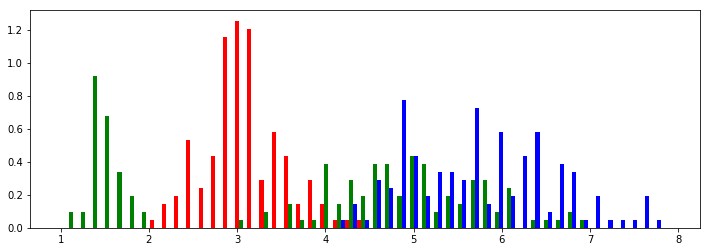

In [19]:
%matplotlib inline
plt.figure(figsize=[12,4])
plt.hist(X[:,0:3], bins=50, color = ('b','r','g'), rwidth=50, density=True, label = label_dict)

### Step 1: Computing the d-dimensional mean vectors

#### <font color ='red'>TODO</font>: Calculate the mean vectors...

In [20]:
np.set_printoptions(precision=4)

mean_vectors = []
# Your code...
for cl in range(1,4):
    mean_vectors.append(np.mean(X[y==cl], axis=0))
    print('Mean Vector class %s: %s\n' %(cl, mean_vectors[cl-1]))

Mean Vector class 1: [5.005999999999999 3.4180000000000006 1.464 0.2439999999999999]

Mean Vector class 2: [5.936 2.7700000000000005 4.26 1.3259999999999998]

Mean Vector class 3: [6.587999999999998 2.9739999999999998 5.552 2.026]



### Step 2: Computing the Scatter Matrices

#### <font color ='red'>TODO</font>: Compute the "within-class scatter matrix"

In [21]:
S_W = np.zeros((4,4))

# Your Code...
ind = (1,2,3,4)

for cl,meanvec in zip(ind, mean_vectors):
    # scatter matrix for every class
    class_matrix = np.zeros((4,4))
    for r in X[y==cl]:
        # make column vectors
        r,meanvec=r.reshape(4,1), meanvec.reshape(4,1)
        class_matrix = class_matrix + (r-meanvec).dot((r-meanvec).T)
    S_W = S_W + class_matrix

print(range(1,4))

# sum class scatter matrices
print('within-class Scatter Matrix:\n', S_W)

range(1, 4)
within-class Scatter Matrix:
 [[38.956199999999995 13.682999999999996 24.614000000000004
  5.6556000000000015]
 [13.682999999999996 17.035000000000004 8.12 4.9132]
 [24.614000000000004 8.12 27.220000000000017 6.2536000000000005]
 [5.6556000000000015 4.9132 6.2536000000000005 6.175599999999998]]


#### <font color ='red'>TODO</font>: Compute "between-class scatter matrix"

In [22]:
overall_mean = np.mean(X, axis=0)

S_B = np.zeros((4,4))

# Your code...
for i,meanvec1 in enumerate(mean_vectors):
    n = X[y==i+1,:].shape[0]
    # make column vectors
    meanvec1 = meanvec1.reshape(4,1)
    
    overall_mean = overall_mean.reshape(4,1)
    
    S_B = S_B + (n*(meanvec1-overall_mean).dot((meanvec1 - overall_mean).T))


print('between-class Scatter Matrix:\n', S_B)

between-class Scatter Matrix:
 [[63.21213333333327 -19.534000000000034 165.16466666666656
  71.36306666666663]
 [-19.534000000000034 10.97760000000001 -56.05520000000008
  -22.492400000000032]
 [165.16466666666656 -56.05520000000008 436.6437333333333
  186.90813333333332]
 [71.36306666666663 -22.492400000000032 186.90813333333332
  80.60413333333332]]


In [23]:
S_B = S_B.astype(float)

In [24]:
S_W = S_W.astype(float)

#### <font color ='red'>TODO</font>: Calculate Eigen Vectors and Eigen Values 

In [25]:
# Your code...
#Multiply S_W-1 and S_B
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))


for i in range(len(eig_vals)):
    eigvecs = eig_vecs[:,i].reshape(1,4)
    print("Eigenvector %s:" % (i+1))
    for j in range(len(eig_vals)):
        print(eigvecs.real[:,j])
        #for j in range(len())
    print ("EigenValue %s: %s \n"% ((i+1), eig_vals.real[i]))
    

Eigenvector 1:
[-0.2049]
[-0.3871]
[0.5465]
[0.7138]
EigenValue 1: 32.27195779972982 

Eigenvector 2:
[-0.009]
[-0.589]
[0.2543]
[-0.767]
EigenValue 2: 0.27756686384004503 

Eigenvector 3:
[0.6104]
[-0.3325]
[-0.3415]
[0.1585]
EigenValue 3: 1.4813709840026172e-15 

Eigenvector 4:
[0.6104]
[-0.3325]
[-0.3415]
[0.1585]
EigenValue 4: 1.4813709840026172e-15 



### Step 3: Solving the generalized eigenvalue problem for the matrix $S^{−1}_{W}. S_{B}$

In [26]:
for i in range(len(eig_vals)):
    eigv = eig_vecs[:,i].reshape(4,1)
    np.testing.assert_array_almost_equal(np.linalg.inv(S_W).dot(S_B).dot(eigv),
                                         eig_vals[i] * eigv,
                                         decimal=6, err_msg='', verbose=True)
print('ok')

ok


### Step 4: Selecting linear discriminants for the new feature subspace

#### <font color ='red'>TODO</font>: Write code for the following...

In [27]:
# Make a list of (eigenvalue, eigenvector) tuples
# Your Code
for i in range(len(eig_vals)):
    eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
# Sort the (eigenvalue, eigenvector) tuples from high to low
# Your Code
eig_pairs[::-1].sort
# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])


Eigenvalues in descending order:
32.27195779972982
0.27756686384004503
6.613543721484293e-15
6.613543721484293e-15


In [28]:
print('Variance explained:\n')
eigv_sum = sum(eig_vals)
for i,j in enumerate(eig_pairs):
    print('eigenvalue {0:}: {1:.2%}'.format(i+1, (j[0]/eigv_sum).real))

Variance explained:

eigenvalue 1: 99.15%
eigenvalue 2: 0.85%
eigenvalue 3: 0.00%
eigenvalue 4: 0.00%


### Step 5: Choosing k eigenvectors with the largest eigenvalues

After sorting the eigenpairs by decreasing eigenvalues, it is now time to construct our k×d-dimensional eigenvector matrix WW (here 4×2: based on the 2 most informative eigenpairs) and thereby reducing the initial 4-dimensional feature space into a 2-dimensional feature subspace.

In [29]:
W = np.hstack((eig_pairs[0][1].reshape(4,1), eig_pairs[1][1].reshape(4,1)))
print('Matrix W:\n', W.real)

Matrix W:
 [[-0.2049 -0.009 ]
 [-0.3871 -0.589 ]
 [ 0.5465  0.2543]
 [ 0.7138 -0.767 ]]
